<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [8]:
# ANSWER
titanic = pd.read_csv('../../../DATA/titanic_train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
titanic.shape

(891, 12)

Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#REMOVING NULLS
# Identify the majority of the nulls within the dataframe
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# To remove the null values within the Cabin column (fillna method)
titanic['Cabin'] = titanic['Cabin'].fillna('N/A')
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [16]:
age_median = titanic['Age'].median()
print(age_median)

28.0


In [17]:
titanic['Age'] = titanic['Age'].fillna(age_median)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [18]:
# Find the most common value in Embarked, to replace nulls
embarked_mode = titanic['Embarked'].mode()
print(embarked_mode)

0    S
dtype: object


In [19]:
# To remove the null values within the Embarked column (fillna method)
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
#Exploring values of interest

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N/A,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N/A,S


In [22]:
# Looking at the survival rate, where 0= Did not survive and 1=survived
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
# Survival rates (percentage)
titanic['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

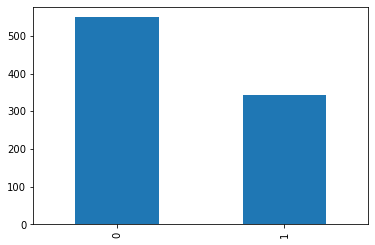

In [24]:
# Survival visual - using pandas plot method
titanic['Survived'].value_counts().plot(kind='bar')

In [25]:
# SUMMARY: 38.4% survived, 61.6% did not

In [26]:
# Gender distribution (percentage)
titanic['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

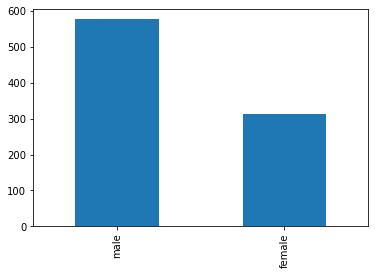

In [27]:
# Gender visual - using pandas plot method
titanic['Sex'].value_counts().plot(kind='bar')

In [28]:
# SUMMARY: 64.8% male, 35.2% female

In [29]:
# Survivors by gender using groupby method based from lab example
gender_survival_groupby = titanic.groupby('Sex')['Survived'].mean()
print(gender_survival_groupby)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


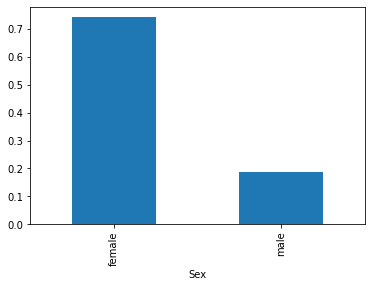

In [30]:
# Visual Survival Rate vs Gender
gender_survival_groupby.plot(kind='bar')

In [31]:
# SUMMARY: Females had a far higher survival rate than men (74.2% vs 18.9%)

In [32]:
# Class distribution
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

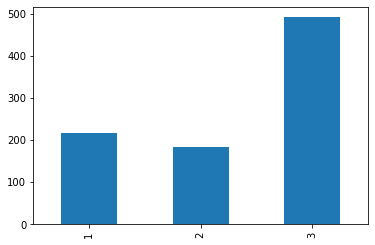

In [33]:
# Class visual - using pandas plot method. Sort Index so that class in in order
titanic['Pclass'].value_counts().sort_index().plot(kind='bar')

In [34]:
# SUMMARY: Lower class passengers took up the majority of the Titanic

In [35]:
#Survival rate vs class (percentage)
print(titanic['Survived'][titanic['Pclass'] == 1].value_counts(normalize=True))
print(titanic['Survived'][titanic['Pclass'] == 2].value_counts(normalize=True))
print(titanic['Survived'][titanic['Pclass'] == 3].value_counts(normalize=True))

1    0.62963
0    0.37037
Name: Survived, dtype: float64
0    0.527174
1    0.472826
Name: Survived, dtype: float64
0    0.757637
1    0.242363
Name: Survived, dtype: float64


In [36]:
# Using groupby method
class_survival_groupby = titanic.groupby('Pclass')['Survived'].mean()
print(class_survival_groupby)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


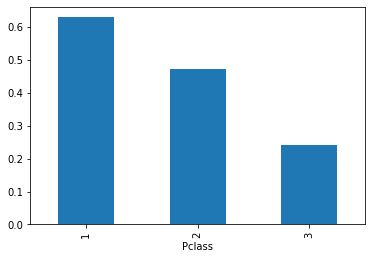

In [37]:
# Visual Survival Rate vs Class
class_survival_groupby.plot(kind='bar')

In [38]:
# SUMMARY: We can see that in 1st class 63% survived, 2nd class 47% survived, 3rd class 24% survived

In [39]:
# Origin of Embarkment
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

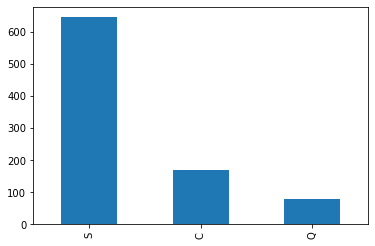

In [40]:
# Embarkement visual - using pandas plot method
titanic['Embarked'].value_counts().plot(kind='bar')

In [41]:
# SUMMARY: Most passengers boarded from Southampton

In [42]:
titanic['Age'].value_counts().head(10)
#note: change Age to a float and round down? But it will mean any baby under the age of 1 (as seen in the min value) will be "0"

28.0    202
24.0     30
22.0     27
18.0     26
19.0     25
30.0     25
21.0     24
25.0     23
36.0     22
29.0     20
Name: Age, dtype: int64

Text(0, 0.5, 'Count')

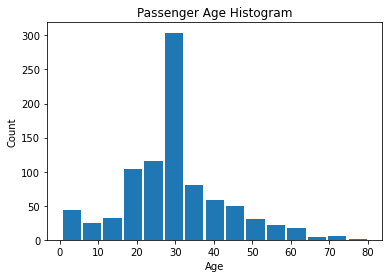

In [43]:
# Proof that median is now heavily weighted, but still a relatively normal distribution
plt.hist(x=titanic['Age'], bins=15, rwidth=0.9)
plt.title('Passenger Age Histogram')
plt.xlabel('Age')
plt.ylabel('Count')

In [44]:
# Binning Ages using pd.cut
age_groups = pd.cut(titanic['Age'], bins=[0,3,18,60,90], labels = ['Baby','Child','Adult','Senior'])
# Add age bins to the dataframe, after 'Age'
titanic.insert(6,'Age Group',age_groups)

In [45]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Age Group,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,Adult,1,0,A/5 21171,7.2500,N/A,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,Adult,0,0,STON/O2. 3101282,7.9250,N/A,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Adult,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,Adult,0,0,373450,8.0500,N/A,S


In [46]:
# Survivors by age using groupby method
age_survival_groupby = titanic.groupby('Age Group')['Survived'].mean()
print(age_survival_groupby)

Age Group
Baby      0.666667
Child     0.458716
Adult     0.365753
Senior    0.227273
Name: Survived, dtype: float64


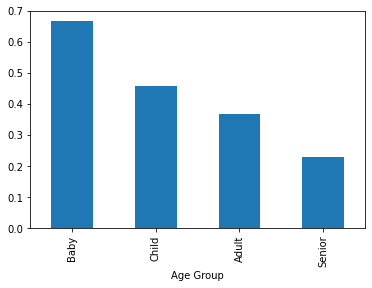

In [47]:
# Visual Survival Rate vs Age Group
age_survival_groupby.plot(kind='bar')

In [48]:
#SUMMARY: Babies/children had a higher survival rate. Seniors had the lowest

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [49]:
y = titanic['Survived']
predictor_columns = ['Pclass','Parch']
X = titanic[predictor_columns]

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=1)
print("Total dataset: {}".format(titanic.shape))
print("Training set (70%): {}".format(X_train.shape))
print("Test set (30%): {}".format(X_test.shape))

Total dataset: (891, 13)
Training set (70%): (623, 2)
Test set (30%): (268, 2)


#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [51]:
# ANSWER
# Create Model
model = LogisticRegression(solver='liblinear')

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [52]:
# ANSWER
# Fit Model
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [53]:
model.coef_

array([[-0.85645583,  0.36168962]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [54]:
model.intercept_

array([1.23873756])

We can create tuples of the predictor names and coefficients like this:

In [55]:
# ANSWER
print(set(zip(predictor_columns, model.coef_[0])))

{('Pclass', -0.8564558342451415), ('Parch', 0.3616896198111094)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [56]:
for col in zip(X_train.columns, model.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.856456
Parch       +0.361690


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [57]:
from sklearn.metrics import mean_absolute_error, accuracy_score

In [59]:
y_pred = model.predict(X_train)
accuracy_score(y_pred,y_train)

0.6934189406099518

In [60]:
model.score(X_train, y_train) #ALTERNATIVE METHOD

0.6934189406099518

What is the  `accuracy_score` for the test data?

In [61]:
# ANSWER
y_pred_test = model.predict(X_test)
accuracy_score(y_pred_test,y_test)

0.664179104477612

In [62]:
model.score(X_test, y_test)

0.664179104477612

What can we say aout this result?

ANSWER
- ...
- ...

In [63]:
#Both the training and test set predicted similarly well. The chance of the model overfitting seems unlikely. 

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [68]:
# Build Model
y = titanic['Survived']
predictor_columns2 = ['Pclass','Parch','Age']
X2 = titanic[predictor_columns2]
model = LogisticRegression()

# Fit Model
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, train_size=0.7,test_size=0.3, random_state=1)
model.fit(X2_train, y_train)

# Score
model.score(X2_train, y_train)

0.7207062600321027

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- ...
- ...
- ...

Let's see where the model is going wrong by showing the Confusion Matrix:

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
# ANSWER
y_pred_class = model.predict(X2_test)
print(confusion_matrix(y_test, y_pred_class))

[[127  26]
 [ 61  54]]


Nb. Here is how `confusion_matrix` arranges its output:

In [71]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: ...

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

In [72]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

ValueError: X has 2 features per sample; expecting 3

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [73]:
titanic_with_dummies = pd.get_dummies(data = titanic, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,PassengerId,Survived,Name,Age,Age Group,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,Adult,1,0,A/5 21171,7.2500,N/A,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Adult,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,Adult,0,0,STON/O2. 3101282,7.9250,N/A,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Adult,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,Adult,0,0,373450,8.0500,N/A,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [74]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [0]:
# ANSWER
# Set Feature Both Numerical, Categorical

Plot the ROC curve for the new model:

In [0]:
# ANSWER

Can we improve the model by including the remaining features?

In [0]:
# ANSWER

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



